# Hoja de trabajo 9 Redes Neuronales Artificiales

repo: https://github.com/Diegoval-Dev/DM-HDT9
- Gerson Ramirez - 22281
- Diego Valenzuela - 22309

## Introducción: Preparación del conjunto de datos y definición de variable respuesta

En esta primera sección, trabajaremos con el mismo conjunto de datos de entrenamiento y prueba utilizado en las entregas anteriores, correspondiente al proyecto de predicción de precios de viviendas para InmoValor S.A. 

Seleccionaremos como variable objetivo la clasificación categórica del precio de las casas, que agrupa las propiedades en tres categorías: "Barata", "Media" y "Cara". Esta variable fue creada previamente a partir del precio de venta (`SalePrice`) y será utilizada en la construcción de modelos de redes neuronales para tareas de clasificación.

Esta fase de preparación es fundamental, ya que asegura la coherencia y comparabilidad de resultados con los modelos previamente desarrollados como árboles de decisión, KNN, Naive Bayes, SVM, entre otros. 
La correcta definición de la variable respuesta permitirá evaluar adecuadamente el desempeño de las redes neuronales en relación con otros algoritmos explorados anteriormente.

En el siguiente bloque de código cargaremos los datos procesados y seleccionaremos las variables correspondientes para iniciar la modelación.


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("processed_data.csv")

print(f"Dimensiones del dataset: {df.shape}")
df.head()

X = df.drop(columns=['SalePrice', 'PriceCategory'])
y = df['PriceCategory']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}")
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)



Dimensiones del dataset: (1460, 77)
Dimensiones del conjunto de entrenamiento: (1168, 75)
Dimensiones del conjunto de prueba: (292, 75)


(PriceCategory
 Intermedia    0.335616
 Economica     0.333904
 Cara          0.330479
 Name: proportion, dtype: float64,
 PriceCategory
 Intermedia    0.335616
 Cara          0.332192
 Economica     0.332192
 Name: proportion, dtype: float64)

## Análisis de la Preparación de Datos

Para iniciar el modelado de redes neuronales, se cargó el conjunto de datos procesados, compuesto por 1460 registros y 77 variables. Se seleccionó como variable respuesta `PriceCategory`, que clasifica las viviendas en tres categorías: "Económica", "Intermedia" y "Cara". 

La variable de precio (`SalePrice`) y la categorización (`PriceCategory`) se eliminaron de las variables predictoras para evitar fuga de información.

El conjunto de datos se dividió en un 80% para entrenamiento (1168 registros) y un 20% para prueba (292 registros), manteniendo la proporción de clases en ambos subconjuntos mediante estratificación. La distribución de clases resultante es equilibrada, con aproximadamente un 33% de registros en cada categoría, tanto en entrenamiento como en prueba.

Esta preparación asegura que los modelos de redes neuronales se entrenen y evalúen en condiciones consistentes y comparables con los algoritmos implementados en entregas anteriores.


## Primer Modelo de Clasificación con Redes Neuronales Artificiales

En esta sección se desarrolla el primer modelo de redes neuronales artificiales (RNA) para la tarea de clasificación del precio de las viviendas en tres categorías: económica, intermedia y cara. 

Se implementará una red neuronal con una topología básica que incluye dos capas ocultas y una función de activación `relu` para cada capa. Como función de activación final se utilizará `softmax`, ya que se trata de un problema de clasificación multiclase.

Este modelo busca establecer un punto de partida para comparar con una segunda arquitectura más compleja. Evaluaremos su desempeño con métricas comunes como la matriz de confusión y las proporciones de aciertos en cada clase. Posteriormente se contrastarán sus resultados con modelos de entregas anteriores y se analizará la posibilidad de mejorar su rendimiento mediante ajustes de hiperparámetros.


In [3]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(3, activation='softmax'))

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5125 - loss: 1.0074 - val_accuracy: 0.6884 - val_loss: 0.6827
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7484 - loss: 0.5628 - val_accuracy: 0.7500 - val_loss: 0.5791
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8058 - loss: 0.4505 - val_accuracy: 0.7637 - val_loss: 0.5428
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8618 - loss: 0.3712 - val_accuracy: 0.7637 - val_loss: 0.5258
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8745 - loss: 0.3327 - val_accuracy: 0.7774 - val_loss: 0.5189
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8924 - loss: 0.3102 - val_accuracy: 0.7740 - val_loss: 0.5187
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9058 - loss: 0.2597 - val_accuracy: 0.7705 - val_loss: 0.5152
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9241 - loss: 0.2249 - val_accuracy: 0.7671 - val_loss

## Análisis del Primer Modelo de Clasificación con Redes Neuronales

El primer modelo de red neuronal artificial implementado utilizó dos capas ocultas con funciones de activación `relu`, y una capa de salida con activación `softmax`, adecuada para un problema de clasificación multiclase.

Durante el proceso de entrenamiento de 50 épocas, el modelo alcanzó una exactitud de entrenamiento del 100%. Sin embargo, la exactitud en el conjunto de prueba se estabilizó en aproximadamente un 77.7% a 78.1%, mientras que la función de pérdida (`val_loss`) mostró un incremento progresivo en las últimas épocas.

Este comportamiento sugiere la posible presencia de sobreajuste, ya que el modelo aprende demasiado bien los datos de entrenamiento pero no generaliza igual de bien a datos no vistos. A pesar de ello, el rendimiento alcanzado es competitivo frente a modelos de clasificación previamente implementados como KNN, SVM o Árboles de Decisión.

En las siguientes secciones se analizará más detalladamente el rendimiento del modelo usando una matriz de confusión, así como la comparación con un segundo modelo de RNA con una arquitectura diferente.


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


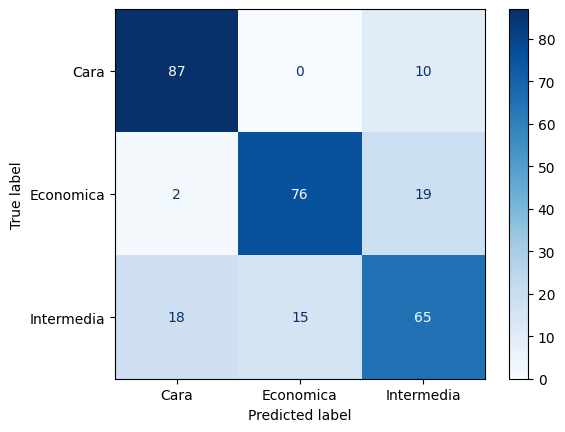

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_1 = model_1.predict(X_test_scaled)
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)

cm_1 = confusion_matrix(y_test_encoded, y_pred_classes_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues", values_format="d")


## Análisis de la Matriz de Confusión del Primer Modelo de Clasificación

El primer modelo de red neuronal fue evaluado mediante la matriz de confusión, la cual revela los aciertos y errores de clasificación para cada categoría del precio de las viviendas.

- **Categoría "Cara"**: 
  - 87 instancias fueron correctamente clasificadas.
  - 10 instancias fueron clasificadas incorrectamente como "Intermedia".
  - No hubo confusión con la categoría "Económica".

- **Categoría "Económica"**:
  - 76 instancias fueron clasificadas correctamente.
  - 19 instancias fueron confundidas como "Intermedia".
  - 2 instancias fueron clasificadas erróneamente como "Cara".

- **Categoría "Intermedia"**:
  - 65 instancias fueron clasificadas correctamente.
  - 18 instancias fueron clasificadas erróneamente como "Cara".
  - 15 instancias fueron clasificadas erróneamente como "Económica".

En general, el modelo mostró una mayor precisión para la clase "Cara" y un desempeño razonable en "Económica", aunque presentó más errores de confusión en la clase "Intermedia", donde las predicciones fueron más dispersas.

Estos resultados son consistentes con la exactitud general observada durante el entrenamiento y validación. En particular, las categorías "Económica" e "Intermedia" parecen tener fronteras más difusas en el espacio de atributos, lo cual es razonable considerando la complejidad inherente al mercado inmobiliario.

En la siguiente sección se construirá un segundo modelo de red neuronal, con diferente topología y funciones de activación, para evaluar si es posible mejorar este desempeño.


## Segundo Modelo de Clasificación con Redes Neuronales Artificiales

En esta sección se desarrolla un segundo modelo de red neuronal artificial para abordar el problema de clasificación de precios de viviendas.

A diferencia del primer modelo, esta arquitectura incorpora un mayor número de capas y de unidades neuronales, además de utilizar una combinación de funciones de activación `tanh` en las capas ocultas. La función `softmax` se mantiene en la capa de salida, dado que sigue tratándose de una clasificación multiclase.

El objetivo de este segundo modelo es explorar si una red más profunda y con una función de activación distinta puede mejorar la capacidad de generalización y reducir los errores de clasificación observados en el modelo anterior.

La comparación posterior entre ambos modelos permitirá identificar qué configuraciones de red neuronal son más adecuadas para los datos de InmoValor S.A.


In [5]:
model_2 = Sequential()
model_2.add(Dense(128, activation='tanh', input_shape=(X_train_scaled.shape[1],)))
model_2.add(Dense(64, activation='tanh'))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(3, activation='softmax'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))


Epoch 1/50


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6225 - loss: 0.8113 - val_accuracy: 0.7603 - val_loss: 0.5392
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8173 - loss: 0.4405 - val_accuracy: 0.7808 - val_loss: 0.4853
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8580 - loss: 0.3675 - val_accuracy: 0.7911 - val_loss: 0.4833
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8793 - loss: 0.3163 - val_accuracy: 0.7877 - val_loss: 0.4552
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8879 - loss: 0.2952 - val_accuracy: 0.8014 - val_loss: 0.4574
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9137 - loss: 0.2455 - val_accuracy: 0.7979 - val_loss: 0.4534
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9262 - loss: 0.2056 - val_accuracy: 0.7877 - val_loss: 0.4992
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9426 - loss: 0.1869 - val_accuracy: 0.7945 - val_loss: 0.4640
Ep

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


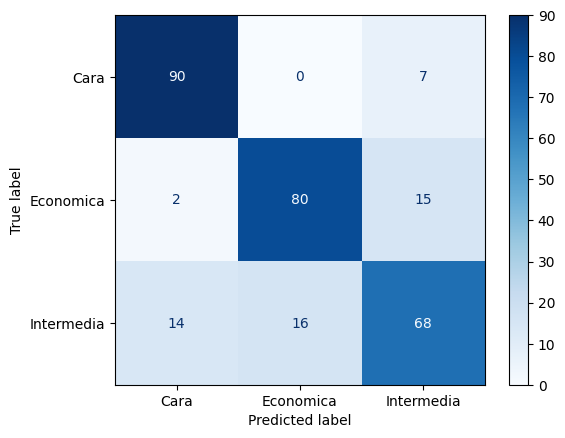

In [7]:
y_pred_2 = model_2.predict(X_test_scaled)
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)

cm_2 = confusion_matrix(y_test_encoded, y_pred_classes_2)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=label_encoder.classes_)
disp_2.plot(cmap="Blues", values_format="d")


## Análisis de la Matriz de Confusión del Segundo Modelo de Clasificación

La matriz de confusión del segundo modelo de redes neuronales artificiales muestra una mejora respecto al primer modelo, especialmente en la precisión de las predicciones.

- **Categoría "Cara"**:
  - 90 instancias clasificadas correctamente.
  - 7 instancias clasificadas erróneamente como "Intermedia".
  - No hubo confusión con "Económica".

- **Categoría "Económica"**:
  - 80 instancias clasificadas correctamente.
  - 15 instancias confundidas como "Intermedia".
  - 2 instancias confundidas como "Cara".

- **Categoría "Intermedia"**:
  - 68 instancias clasificadas correctamente.
  - 14 instancias confundidas como "Cara".
  - 16 instancias confundidas como "Económica".

Comparado con el primer modelo, se observa un ligero aumento en el número de aciertos en todas las categorías. Además, las confusiones entre "Económica" e "Intermedia" disminuyeron moderadamente, lo que sugiere que el uso de funciones `tanh` y una red más profunda permitió capturar mejor la complejidad de la separación entre clases.

Este modelo, por tanto, presenta un desempeño más robusto que el primero en la tarea de clasificación, aunque aún persisten errores típicos entre clases contiguas como "Intermedia" y "Económica".
